In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

df_1=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df_1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Checking Null values

<AxesSubplot:>

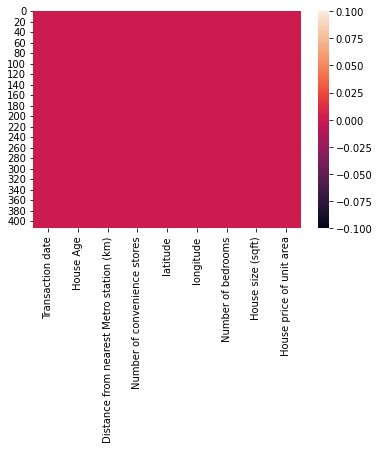

In [27]:
sns.heatmap(df_1.isnull())

In [5]:
df_1.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### EDA

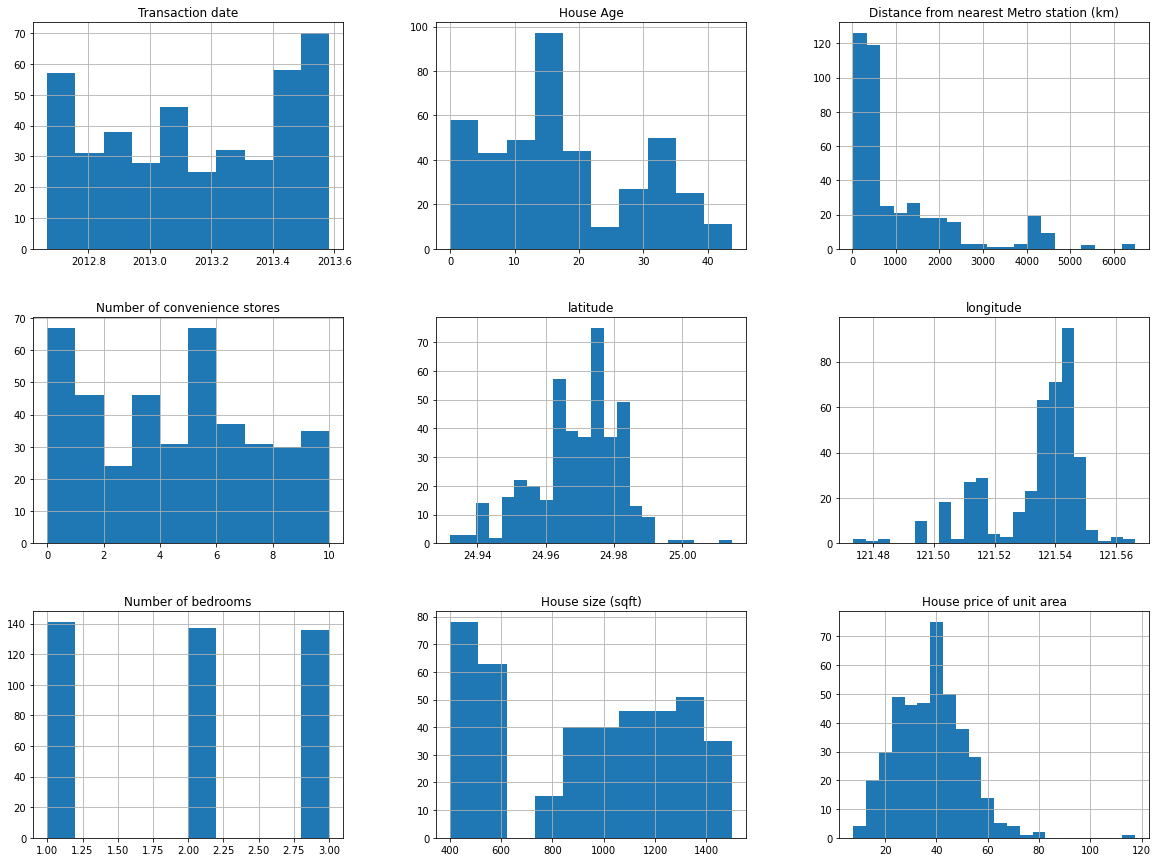

In [9]:
%matplotlib inline
df_1.hist(bins='auto', figsize=(20,15))
plt.show()

In [16]:
df_1.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

### Function to plot Highly Correlated Columns with respect to Target Column

In [18]:
def scatter(i,ax1):
    ax1.scatter(df_1.index, df_1[i], s=10, c='lightblue', marker="s", label=i)
    ax1.scatter(df_1.index,df_1['House price of unit area'], s=10, c='gold', marker="o", label='House price of unit area')
    plt.legend(loc='upper left');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('{} vs House price of unit area graph'.format(i))

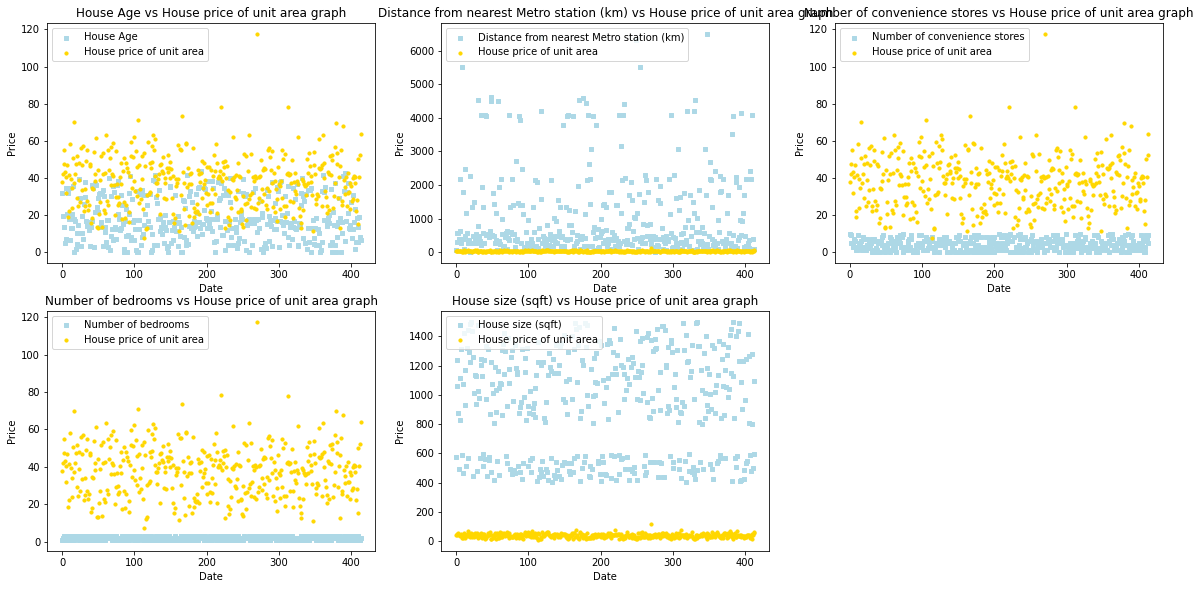

In [20]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scatter('House Age',ax1)
ax1 = fig.add_subplot(332)
scatter('Distance from nearest Metro station (km)',ax1)
ax1 = fig.add_subplot(333)
scatter('Number of convenience stores',ax1)
ax1 = fig.add_subplot(334)
scatter('Number of bedrooms',ax1)
ax1 = fig.add_subplot(335)
scatter('House size (sqft)',ax1)

### Splitting the data

In [116]:
X=df_1.drop(['Transaction date','House price of unit area'],axis=1).values
y=df_1['House price of unit area'].values

In [117]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

## Processing Model

#### Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,verbose=2,random_state=1)

model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(random_state=1, verbose=2)

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([-5.32374194, -5.78870968, -4.1936129 , -6.75890323, -4.43574194,
       -4.60512903, -4.34645161, -6.08558065, -5.55      , -4.824     ,
       -3.8896129 , -6.13006452, -5.51929032, -4.03819355, -5.70477419,
       -4.5923871 , -6.09741935, -4.98309677, -3.86709677, -6.0023871 ,
       -8.66919355, -4.82358065, -5.21467742, -3.95380645, -4.49712903,
       -5.29670968, -5.29506452, -6.86516129, -4.02648387, -4.82583871])

In [160]:
from numpy import mean
from numpy import std

y_pred=model.predict(X_test)


print("MSE:- ",mean_squared_error(y_test,y_pred))
print("MAE:- ",mean_absolute_error(y_test,y_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2:- ",r2_score(y_test,y_pred))

MSE:-  49.97805457692308
MAE:-  4.918057692307686
Negative MAE: -5.207 (1.049)
RMSE: 7.069515865808852
R2:-  0.7169486196893173


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [161]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
0,27.3,25.318
1,54.4,46.120
2,22.0,25.593
3,11.6,17.150
4,45.4,69.981
...,...,...
99,55.2,43.767
100,46.6,36.985
101,46.2,52.332
102,24.4,24.323


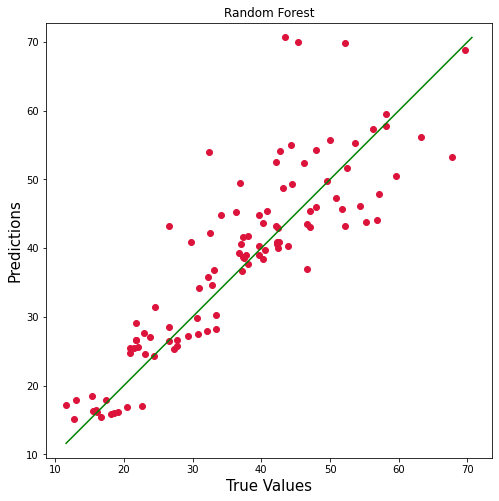

In [162]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Random Forest")
plt.axis('equal')
plt.show()

#### XGboost

In [80]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [82]:
clf_pred=clf.predict(X_test)
clf_pred

array([25.61743091, 46.98735935, 26.62391684, 18.20598159, 70.89982439,
       27.20020589, 25.31282553, 35.60809262, 43.59311956, 14.93212207,
       17.18582745, 39.1158304 , 25.26359486, 46.62736868, 62.96190117,
       25.92632459, 72.14434101, 47.61635787, 25.83996552, 51.55872202,
       41.96216878, 24.1275778 , 41.5290025 , 55.84553729, 48.76197786,
       24.58435309, 28.13809855, 50.2287349 , 49.66377212, 16.96146491,
       28.41644896, 42.88773769, 38.61818206, 49.31727299, 47.53365453,
       17.86230853, 42.22401989, 41.11613823, 38.50981752, 18.01216624,
       41.43963311, 19.68142597, 58.16661236, 29.49794517, 30.86165912,
       28.39199014, 26.65808939, 40.84878335, 44.27555383, 36.85183448,
       17.69516292, 51.97786652, 44.50340046, 18.01900669, 48.509804  ,
       45.24859066, 71.58185263, 34.78869863, 45.45405528, 38.5160195 ,
       25.36261263, 37.76848021, 25.60134259, 17.15139417, 47.53567137,
       51.54618928, 49.7664702 , 38.7459185 , 17.85186108, 45.89

MSE:-  49.29251298904107
MAE:-  5.075615035547998
Negative MAE: -5.401 (1.056)
R2:-  0.7208311936380836


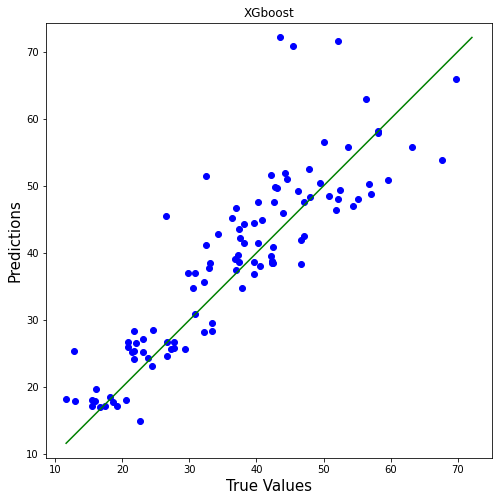

In [83]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print("MSE:- ",mean_squared_error(y_test,clf_pred))
print("MAE:- ",mean_absolute_error(y_test,clf_pred))
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("R2:- ",r2_score(y_test,clf_pred))

result = pd.DataFrame({'Actual': y_test, 'Predicted': clf_pred})
result

plt.figure(figsize=(8,8))
plt.scatter(y_test, clf_pred, c='blue')

p1 = max(max(clf_pred), max(y_test))
p2 = min(min(clf_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("XGboost")
plt.axis('equal')
plt.show()

In [163]:
m1=r2_score(y_test,y_pred)
m2=r2_score(y_test,clf_pred)
mm=[m1,m2]
rs=pd.DataFrame(mm,index=['Random Forest','XGboost'],columns=['R2_Score'])
rs

,R2_Score
Random Forest,0.716949
XGboost,0.720831
